Importing the libraries and the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [ ]:
customer_data = pd.read_csv("C:\\Users\\SHIVAM MISHRA\Downloads\\Mall_Customers.csv")
customer_data.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
#Getting some information about data set
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Choosing the annual income column & spending score column
x = customer_data.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
#Choosing the number of clusters
#wcss->  With in clusters sum of squares
#Finding wcss values for different number of clusters


wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

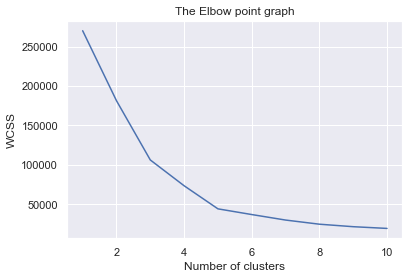

In [ ]:
#Plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Optimum number of clusters=5
#Training the k-means Clustering Model
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

#Return a label for each data point based on their cluster
y = kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


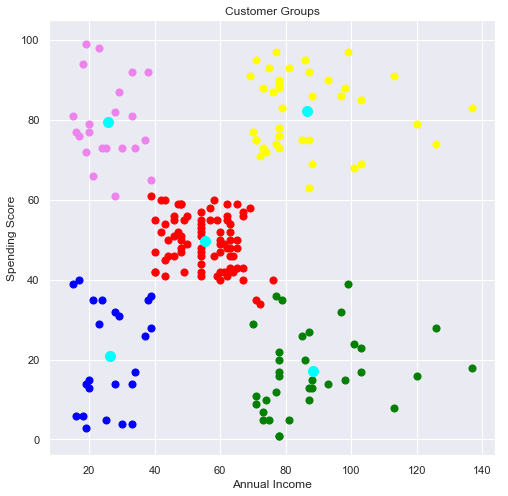

In [ ]:
# 5 Clusters - 0,1,2,3,4,5
#Visualizing the clusters
#Ploting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s=50, c='green', label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1], s=50, c='red', label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1], s=50, c='yellow', label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1], s=50, c='violet', label='Cluster4')
plt.scatter(x[y==4,0],x[y==4,1], s=50, c='blue', label='Cluster5')

#Plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()